# Web Scraping - import necessary libraries

In [39]:
from bs4 import BeautifulSoup
import requests
import pandas as pd

# enter the url of the website to get the data from

In [2]:
url = "https://playback.fm/charts/top-100-songs/2021"

In [3]:
response = requests.get(url)
response.status_code

200

# look at the content of the data

In [4]:
soup = BeautifulSoup(response.content, "html.parser")

In [ ]:
print(soup.prettify())

In [ ]:
soup.select("td:nth-child(2) > a")

In [8]:
soup.select("td:nth-child(2) > a")[0].get_text()

'\nDua Lipa & DaBaby\n'

In [9]:
#myTable > tbody > tr:nth-child(1) > td:nth-child(2) > span

In [10]:
soup.select("td.mobile-hide > a > span.song")[0].get_text()

'Levitating'

In [11]:
soup.select("td:nth-child(2) > a")[0].get_text()

'\nDua Lipa & DaBaby\n'

# put the artist and song names into a dataframe

In [ ]:
artist = []
song = []


# define the number of iterations of our for loop
# by checking how many elements are in the retrieved result set

num_iter = len(soup.select("td:nth-child(2) > a"))

a_list = soup.select("td:nth-child(2) > a")
s_list = soup.select("td.mobile-hide > a > span.song")
# iterate through the result set and retrive all the data
for i in range(num_iter):
    artist.append(a_list[i].get_text())
    song.append(s_list[i].get_text())

print(artist)
print(song)

In [13]:
artist[0]

'\nDua Lipa & DaBaby\n'

In [14]:
song[0]

'Levitating'

In [15]:
song_singers = pd.DataFrame({"artist":artist, "song":song})

In [16]:
song_singers.head()

,artist,song
0,\nDua Lipa & DaBaby\n,Levitating
1,\nOlivia Rodrigo\n,Drivers License
2,\nThe Weeknd & Ariana Grande\n,Save Your Tears
3,\nLil Nas X\n,Montero (Call Me by Your Name)
4,\nThe Weeknd\n,Blinding Lights


# clean the dataframe 

In [17]:
song_singers['artist'] = song_singers['artist'].str.replace('\n', ' ')

In [18]:
song_singers.head()

,artist,song
0,Dua Lipa & DaBaby,Levitating
1,Olivia Rodrigo,Drivers License
2,The Weeknd & Ariana Grande,Save Your Tears
3,Lil Nas X,Montero (Call Me by Your Name)
4,The Weeknd,Blinding Lights


# compare the dataframe with an input
asking user for a song as an input, if the input is in our data
we give back a random song back from the data, if not then we say that 'sorry we don't have a song recommendation'

In [19]:
song_of_the_user = input("Enter your song: ")
print(song_of_the_user)

Enter your song: you
you


In [20]:
print(song_singers['song'].sample())

82    Good Time
Name: song, dtype: object


In [21]:
song_singers['song'].str.match(song_of_the_user).any()


False

In [22]:
if song_singers['song'].str.match(song_of_the_user).any() == True:
    print(song_singers['song'].sample())
else:
    print("We are sorry that we do not have a song recommendation for you now.")

We are sorry that we do not have a song recommendation for you now.


# write a function for easy web scraping from the top song websites

In [23]:
def webscraper(url):
    any_response = requests.get(url)
    any_soup = BeautifulSoup(any_response.content, 'html.parser')
    artist = []
    song = []
    num_iters = len(any_soup.select('td:nth-child(2) > a'))
    a_list = any_soup.select('td:nth-child(2) > a')
    s_list = any_soup.select('td.mobile-hide > a > span.song')
    for i in range(num_iters):
        artist.append(a_list[i].get_text())
        song.append(s_list[i].get_text())
    test = pd.DataFrame({'artist':artist,'song':song})
    return test

url1 = 'https://playback.fm/charts/rnb/2017'
url2 = 'https://playback.fm/charts/rnb/2021'
top_2017 = webscraper(url1)
top_2021 = webscraper(url2)


In [24]:
songs_list = pd.concat([top_2017, top_2021], ignore_index=True)

In [25]:
songs_list

,artist,song
0,\nBruno Mars\n,That's What I Like
1,\nDJ Khaled featuring Rihanna & Bryson Tiller\n,Wild Thoughts
2,\nPost Malone\n,Rockstar
3,\nDJ Khaled\n,I'm the One
4,\nBruno Mars\n,24K Magic
...,...,...
195,\nDrake featuring Lil Baby\n,Wants And Needs
196,\nSummer Walker\n,Broken Promises
197,\nMegan Thee Stallion\n,Body
198,\nYoungBoy Never Broke Again\n,Nevada


In [26]:
songs_list.artist = songs_list.artist.str.replace('\n', ' ')

In [64]:
songs_list

,artist,song
0,Bruno Mars,That's What I Like
1,DJ Khaled featuring Rihanna & Bryson Tiller,Wild Thoughts
2,Post Malone,Rockstar
3,DJ Khaled,I'm the One
4,Bruno Mars,24K Magic
...,...,...
195,Drake featuring Lil Baby,Wants And Needs
196,Summer Walker,Broken Promises
197,Megan Thee Stallion,Body
198,YoungBoy Never Broke Again,Nevada


In [ ]:
# Concat the 3 playlist all together and run the function above again

In [65]:
top_300_songs = pd.concat([song_singers,songs_list])


In [66]:
top_300_songs 

,artist,song
0,Dua Lipa & DaBaby,Levitating
1,Olivia Rodrigo,Drivers License
2,The Weeknd & Ariana Grande,Save Your Tears
3,Lil Nas X,Montero (Call Me by Your Name)
4,The Weeknd,Blinding Lights
...,...,...
195,Drake featuring Lil Baby,Wants And Needs
196,Summer Walker,Broken Promises
197,Megan Thee Stallion,Body
198,YoungBoy Never Broke Again,Nevada


In [ ]:
# ask a user for a song, if the song is in the top_300 songs list
# then suggest another song from the list. If not, say "sorry"

In [69]:
song_of_the_user = input("Enter your song: ")
print(song_of_the_user)

Enter your song: Nevada
Nevada


In [70]:
if top_300_songs['song'].str.match(song_of_the_user).any() == True:
    print(top_300_songs['song'].sample())
else:
    print("We are sorry that we do not have a song recommendation for you now.")

11    Passionfruit
Name: song, dtype: object


# Practice web scraping

In [27]:
# Retrieve an arbitrary Wikipedia page of "Python" and create a list of links on that page: 
# url ='https://en.wikipedia.org/wiki/Python'

In [28]:
url ='https://en.wikipedia.org/wiki/Python'
any_response = requests.get(url)
any_soup = BeautifulSoup(any_response.content, 'html.parser')

In [29]:
any_response.status_code

200

In [ ]:
print(any_soup.prettify())

In [31]:
any_soup.select('link')


[<link href="/w/load.php?lang=en&amp;modules=ext.uls.interlanguage%7Cext.visualEditor.desktopArticleTarget.noscript%7Cext.wikimediaBadges%7Cskins.vector.styles.legacy%7Cwikibase.client.init&amp;only=styles&amp;skin=vector" rel="stylesheet"/>,
 <link href="/w/load.php?lang=en&amp;modules=site.styles&amp;only=styles&amp;skin=vector" rel="stylesheet"/>,
 <link href="//upload.wikimedia.org" rel="preconnect"/>,
 <link href="//en.m.wikipedia.org/wiki/Python" media="only screen and (max-width: 720px)" rel="alternate"/>,
 <link href="/w/index.php?title=Python&amp;action=edit" rel="alternate" title="Edit this page" type="application/x-wiki"/>,
 <link href="/static/apple-touch/wikipedia.png" rel="apple-touch-icon"/>,
 <link href="/static/favicon/wikipedia.ico" rel="icon"/>,
 <link href="/w/opensearch_desc.php" rel="search" title="Wikipedia (en)" type="application/opensearchdescription+xml"/>,
 <link href="//en.wikipedia.org/w/api.php?action=rsd" rel="EditURI" type="application/rsd+xml"/>,
 <link

In [32]:
any_soup.select('a')[1]['href']  

'#mw-head'

In [ ]:
any_soup.select('a')

# API Wrappers - Spotify

In [178]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

In [1]:
secrets_file = open("secrets.txt","r")
# open from python not from pandas, opening for reading 'r'

In [2]:
string = secrets_file.read()

In [ ]:
string

In [ ]:
string.split('\n')

In [5]:
secrets_dict={}
for line in string.split('\n'):
    if len(line) > 0:
        secrets_dict[line.split(':')[0]]=line.split(':')[1].strip()

In [ ]:
secrets_dict

In [7]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

#Initialize SpotiPy with user credentials
sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id=secrets_dict['cid'],
                                                           client_secret=secrets_dict['csecret']))


# Handling large playlists

In [44]:
from random import randint
from time import sleep

def get_playlist_tracks(playlist_id):
    results = sp.user_playlist_tracks("spotify",playlist_id)
    tracks = results['items']
    while results['next']!=None:
        results = sp.next(results)
        tracks = tracks + results['items']
        sleep(randint(1,6000)/1000)
    return tracks

## Large playlist 1
checking its structure, then taking the artist and song names


In [11]:
playlist1 = get_playlist_tracks("4pbDDX7np7Q1H0ghL7U9o7")
len(playlist1)

3878

In [12]:
playlist1[0]['track'].keys()

dict_keys(['album', 'artists', 'available_markets', 'disc_number', 'duration_ms', 'episode', 'explicit', 'external_ids', 'external_urls', 'href', 'id', 'is_local', 'name', 'popularity', 'preview_url', 'track', 'track_number', 'type', 'uri'])

In [ ]:
playlist1[0]['track']['album']

# this album information holds both artist and song names

In [14]:
playlist1[0]['track']['album'].keys()

dict_keys(['album_type', 'artists', 'available_markets', 'external_urls', 'href', 'id', 'images', 'name', 'release_date', 'release_date_precision', 'total_tracks', 'type', 'uri'])

In [15]:
playlist1[0]['track']['artists']

[{'external_urls': {'spotify': 'https://open.spotify.com/artist/7IAXZaLTb6nkJr8RmVPn5y'},
  'href': 'https://api.spotify.com/v1/artists/7IAXZaLTb6nkJr8RmVPn5y',
  'id': '7IAXZaLTb6nkJr8RmVPn5y',
  'name': 'ANGRA',
  'type': 'artist',
  'uri': 'spotify:artist:7IAXZaLTb6nkJr8RmVPn5y'}]

In [16]:
playlist1[0]['track']['name']

'Live and Learn'

In [17]:
len(playlist1)

3878

In [18]:
def get_name_artist_from_playlist_item(playlist_item):
    return get_name_artists_from_track(playlist_item['track'])

In [19]:
def get_name_artists_from_track(track):
    return [(track["name"],artist["name"]) for artist in track["artists"]]



In [ ]:
playlist1_songs_artists =[]

for i in range (len(playlist1)):
    my_track = playlist1[i]['track']['album']
    result = get_name_artists_from_track(my_track)
    playlist1_songs_artists.append(result)
    print(result)

In [23]:
def flatten(input_list):
    return [item for sublist in input_list for item in sublist]

In [ ]:
flatten(playlist1_songs_artists)

# list of all songs and their artists in the playlist1

## Large playlist 2
checking its structure, then taking the artist and song names

In [ ]:
# A new playlist (playlist2)

In [25]:
playlist2 = get_playlist_tracks("532F1h299qKD894BlPfJJF")
len(playlist2)

6246

In [ ]:
playlist2

In [28]:
playlist2[0]['track'].keys()

dict_keys(['album', 'artists', 'available_markets', 'disc_number', 'duration_ms', 'episode', 'explicit', 'external_ids', 'external_urls', 'href', 'id', 'is_local', 'name', 'popularity', 'preview_url', 'track', 'track_number', 'type', 'uri'])

In [29]:
playlist1[0]['track']['album']

{'album_type': 'album',
 'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/7IAXZaLTb6nkJr8RmVPn5y'},
   'href': 'https://api.spotify.com/v1/artists/7IAXZaLTb6nkJr8RmVPn5y',
   'id': '7IAXZaLTb6nkJr8RmVPn5y',
   'name': 'ANGRA',
   'type': 'artist',
   'uri': 'spotify:artist:7IAXZaLTb6nkJr8RmVPn5y'}],
 'available_markets': ['AD',
  'AE',
  'AG',
  'AL',
  'AM',
  'AO',
  'AR',
  'AT',
  'AU',
  'AZ',
  'BA',
  'BB',
  'BD',
  'BE',
  'BF',
  'BG',
  'BH',
  'BI',
  'BJ',
  'BN',
  'BO',
  'BR',
  'BS',
  'BT',
  'BW',
  'BY',
  'BZ',
  'CA',
  'CD',
  'CG',
  'CH',
  'CI',
  'CL',
  'CM',
  'CO',
  'CR',
  'CV',
  'CW',
  'CY',
  'CZ',
  'DE',
  'DJ',
  'DK',
  'DM',
  'DO',
  'DZ',
  'EC',
  'EE',
  'EG',
  'ES',
  'FI',
  'FJ',
  'FM',
  'FR',
  'GA',
  'GB',
  'GD',
  'GE',
  'GH',
  'GM',
  'GN',
  'GQ',
  'GR',
  'GT',
  'GW',
  'GY',
  'HK',
  'HN',
  'HR',
  'HT',
  'HU',
  'ID',
  'IE',
  'IL',
  'IN',
  'IQ',
  'IS',
  'IT',
  'JM',
  'JO',
  'JP',
  'K

## Large Playlists 3 

In [30]:
playlist3 = get_playlist_tracks("6tIxyT1Gq6O7DK7rIEUEZo")
len(playlist3)

9999

In [31]:
len(playlist3)

9999

In [32]:
display(playlist3[0]['track'].keys())
playlist1[0]['track'].keys()

dict_keys(['album', 'artists', 'available_markets', 'disc_number', 'duration_ms', 'episode', 'explicit', 'external_ids', 'external_urls', 'href', 'id', 'is_local', 'name', 'popularity', 'preview_url', 'track', 'track_number', 'type', 'uri'])

dict_keys(['album', 'artists', 'available_markets', 'disc_number', 'duration_ms', 'episode', 'explicit', 'external_ids', 'external_urls', 'href', 'id', 'is_local', 'name', 'popularity', 'preview_url', 'track', 'track_number', 'type', 'uri'])

# dealing with auido features 

In [33]:
playlist1[0]['track']['uri']

'spotify:track:5LZci9wxIwwvF9qh8cMpHS'

In [34]:
song_uri = playlist1[0]['track']['uri']

In [35]:
features=sp.audio_features(song_uri)

In [36]:
features[0]

{'danceability': 0.431,
 'energy': 0.984,
 'key': 1,
 'loudness': -5.131,
 'mode': 1,
 'speechiness': 0.0907,
 'acousticness': 0.00591,
 'instrumentalness': 2.67e-06,
 'liveness': 0.065,
 'valence': 0.167,
 'tempo': 144.996,
 'type': 'audio_features',
 'id': '5LZci9wxIwwvF9qh8cMpHS',
 'uri': 'spotify:track:5LZci9wxIwwvF9qh8cMpHS',
 'track_href': 'https://api.spotify.com/v1/tracks/5LZci9wxIwwvF9qh8cMpHS',
 'analysis_url': 'https://api.spotify.com/v1/audio-analysis/5LZci9wxIwwvF9qh8cMpHS',
 'duration_ms': 254293,
 'time_signature': 4}

# Creating a dataframe with artist, song, and audio features

In [40]:
def playlist_df_creator(owner, playlist_id):
    
    # Create empty dataframe
    playlist_features_list = ["artist","album","track_name", "track_id","danceability","energy","key","loudness","mode", "speechiness","acousticness","instrumentalness","liveness","valence","tempo","type","id","uri","track_href","analysis_url", "duration_ms","time_signature"]
    
    playlist_df = pd.DataFrame(columns = playlist_features_list)
    
    all_tracks = get_playlist_tracks(playlist_id)
    # Explore every track in the playlist, extract features and append the features to the playlist_df
#     playlist = sp.user_playlist_tracks(owner, playlist_id)
#     tracks = playlist['items']
    
    for track in all_tracks:
        
        # Create empty dictionary
        playlist_features = {}
        
        # Get metadata
        playlist_features["artist"] = track["track"]["album"]["artists"][0]["name"]
        playlist_features["album"] = track["track"]["album"]["name"]
        playlist_features["track_name"] = track["track"]["name"]
        playlist_features["track_id"] = track["track"]["id"]
        
        # Get audio features
        audio_features = sp.audio_features(playlist_features["track_id"])[0]
        for feature in playlist_features_list[4:]:
            playlist_features[feature] = audio_features[feature]
        
        # Concat the dfs
        track_df = pd.DataFrame(playlist_features, index = [0])
        playlist_df = pd.concat([playlist_df, track_df], ignore_index = True)
        
    return playlist_df

In [45]:
playlist_df_1 = playlist_df_creator("spotify", "4pbDDX7np7Q1H0ghL7U9o7")


ReadTimeout: HTTPSConnectionPool(host='api.spotify.com', port=443): Read timed out. (read timeout=5)

In [ ]:
playlist_df_2 = playlist_df_creator("spotify", "532F1h299qKD894BlPfJJF")


In [ ]:
playlist_df_3 = playlist_df_creator("spotify", "532F1h299qKD894BlPfJJF")


In [ ]:
# No way of getting the playlists from spotify in a dataframe. 
# Giving up on extracting the data from spotify
# Getting the data from Kaggle

In [91]:
playlist_df = pd.read_csv('genres_v2.csv')




/var/folders/rj/ty5_khc929v572g5r_tjk0sw0000gn/T/ipykernel_10419/40271709.py:1: DtypeWarning: Columns (19) have mixed types. Specify dtype option on import or set low_memory=False.
  playlist_df = pd.read_csv('genres_v2.csv')


In [92]:
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)

playlist_df.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,genre,song_name,Unnamed: 0,title
0,0.831,0.814,2,-7.364,1,0.4200,0.0598,0.013400,0.0556,0.3890,156.985,audio_features,2Vc6NJ9PW9gD9q343XFRKx,spotify:track:2Vc6NJ9PW9gD9q343XFRKx,https://api.spotify.com/v1/tracks/2Vc6NJ9PW9gD...,https://api.spotify.com/v1/audio-analysis/2Vc6...,124539,4,Dark Trap,Mercury: Retrograde,NaN,NaN
1,0.719,0.493,8,-7.230,1,0.0794,0.4010,0.000000,0.1180,0.1240,115.080,audio_features,7pgJBLVz5VmnL7uGHmRj6p,spotify:track:7pgJBLVz5VmnL7uGHmRj6p,https://api.spotify.com/v1/tracks/7pgJBLVz5Vmn...,https://api.spotify.com/v1/audio-analysis/7pgJ...,224427,4,Dark Trap,Pathology,NaN,NaN
2,0.850,0.893,5,-4.783,1,0.0623,0.0138,0.000004,0.3720,0.0391,218.050,audio_features,0vSWgAlfpye0WCGeNmuNhy,spotify:track:0vSWgAlfpye0WCGeNmuNhy,https://api.spotify.com/v1/tracks/0vSWgAlfpye0...,https://api.spotify.com/v1/audio-analysis/0vSW...,98821,4,Dark Trap,Symbiote,NaN,NaN
3,0.476,0.781,0,-4.710,1,0.1030,0.0237,0.000000,0.1140,0.1750,186.948,audio_features,0VSXnJqQkwuH2ei1nOQ1nu,spotify:track:0VSXnJqQkwuH2ei1nOQ1nu,https://api.spotify.com/v1/tracks/0VSXnJqQkwuH...,https://api.spotify.com/v1/audio-analysis/0VSX...,123661,3,Dark Trap,ProductOfDrugs (Prod. The Virus and Antidote),NaN,NaN
4,0.798,0.624,2,-7.668,1,0.2930,0.2170,0.000000,0.1660,0.5910,147.988,audio_features,4jCeguq9rMTlbMmPHuO7S3,spotify:track:4jCeguq9rMTlbMmPHuO7S3,https://api.spotify.com/v1/tracks/4jCeguq9rMTl...,https://api.spotify.com/v1/audio-analysis/4jCe...,123298,4,Dark Trap,Venom,NaN,NaN


In [93]:
playlist_df.columns

Index(['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'type', 'id', 'uri', 'track_href', 'analysis_url', 'duration_ms',
       'time_signature', 'genre', 'song_name', 'Unnamed: 0', 'title'],
      dtype='object')

In [67]:
playlist_df.shape

(42305, 22)

In [68]:
playlist_df.isna().sum()

danceability            0
energy                  0
key                     0
loudness                0
mode                    0
speechiness             0
acousticness            0
instrumentalness        0
liveness                0
valence                 0
tempo                   0
type                    0
id                      0
uri                     0
track_href              0
analysis_url            0
duration_ms             0
time_signature          0
genre                   0
song_name           20786
Unnamed: 0          21525
title               21525
dtype: int64

In [94]:
playlist_df = playlist_df.drop(columns = ['track_href', 'analysis_url', 'duration_ms',
       'time_signature', 'Unnamed: 0', 'title'])



In [137]:
playlist_df = playlist_df.dropna()

In [139]:
playlist_df.shape

(21519, 16)

## Song recommender with the new playlist from spotify

In [140]:
song_of_the_user = input("Enter your song: ")
print(song_of_the_user)

Enter your song: nein
nein


In [141]:
if playlist_df['song_name'].str.match(song_of_the_user).any() == True:
    print(playlist_df['song_name'].sample())
else:
    print("We are sorry that we do not have a song recommendation for you now.")

We are sorry that we do not have a song recommendation for you now.


# Clustering - Kmeans

In [142]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import cluster, datasets
from sklearn.preprocessing import StandardScaler
from matplotlib.lines import Line2D


In [143]:
df = playlist_df

In [144]:
df.columns

Index(['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'type', 'id', 'uri', 'genre', 'song_name'],
      dtype='object')

In [145]:
X = df[['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence']]
y = df['song_name']

In [146]:
X.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence
0,0.831,0.814,2,-7.364,1,0.4200,0.0598,0.013400,0.0556,0.3890
1,0.719,0.493,8,-7.230,1,0.0794,0.4010,0.000000,0.1180,0.1240
2,0.850,0.893,5,-4.783,1,0.0623,0.0138,0.000004,0.3720,0.0391
3,0.476,0.781,0,-4.710,1,0.1030,0.0237,0.000000,0.1140,0.1750
4,0.798,0.624,2,-7.668,1,0.2930,0.2170,0.000000,0.1660,0.5910


## Scaling the features

In [148]:
from sklearn.preprocessing import StandardScaler
X_prep = StandardScaler().fit_transform(X) # X is all the extracted features from songs
# Now, all features will have the same weight.
pd.DataFrame(X_prep,columns=X.columns).head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence
0,0.981142,0.892058,-0.851506,-0.111620,0.8457,1.720137,-0.515637,-0.283449,-0.922819,-0.121456
1,0.278612,-0.934762,0.773019,-0.065516,0.8457,-0.701566,1.121242,-0.344165,-0.510852,-1.255378
2,1.100322,1.341649,-0.039244,0.776386,0.8457,-0.823149,-0.736319,-0.344146,1.166063,-1.618661
3,-1.245628,0.704254,-1.393015,0.801502,0.8457,-0.533767,-0.688824,-0.344165,-0.537261,-1.037152
4,0.774147,-0.189237,-0.851506,-0.216212,0.8457,0.817153,0.238517,-0.344165,-0.193955,0.742892


## choosing k with inertia and silhouette metrics

Text(0.5, 1.0, 'Elbow Method showing the optimal k')

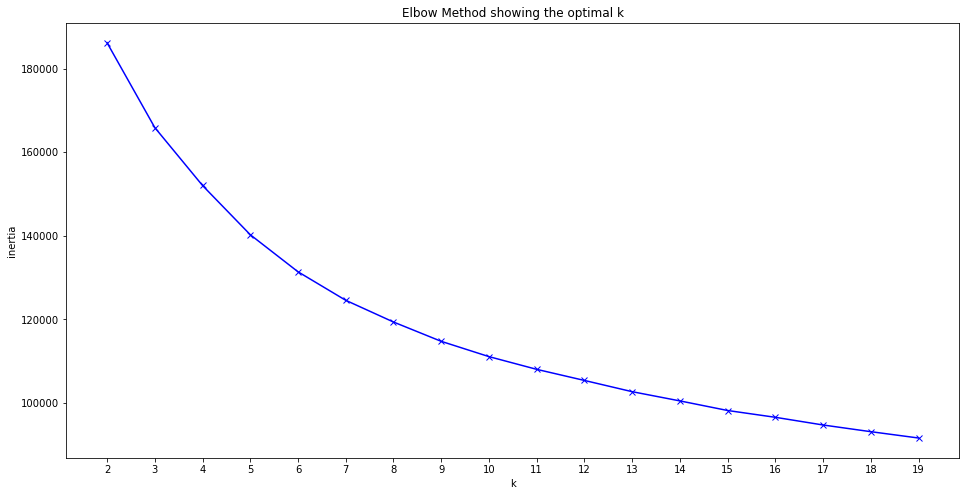

In [150]:
from sklearn.cluster import KMeans
import numpy as np
K = range(2, 20)
inertia = []
for k in K:
    kmeans = KMeans(n_clusters=k,
                    random_state=1234)
    kmeans.fit(X_prep)
    inertia.append(kmeans.inertia_)
    

import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16,8))
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Elbow Method showing the optimal k')


Text(0.5, 1.0, 'Slhouette score showing the optimal k')

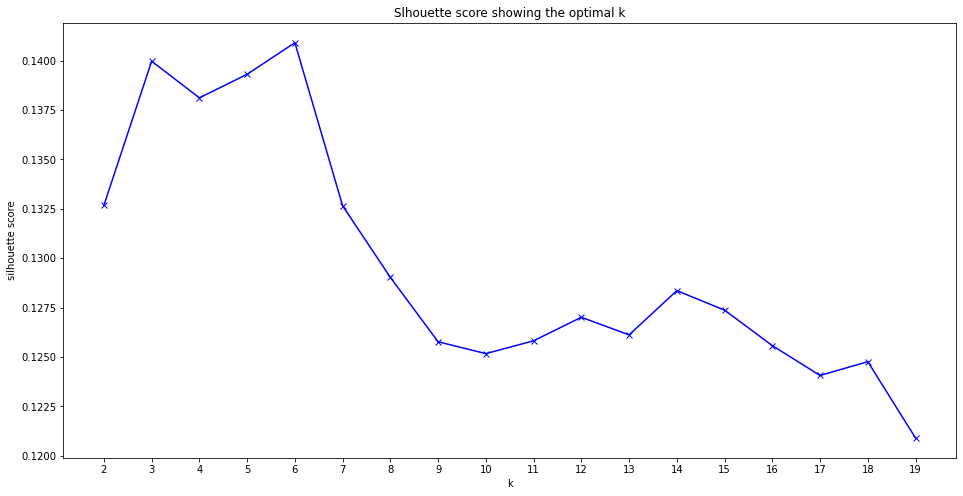

In [151]:
from sklearn.metrics import silhouette_score
K = range(2, 20)
silhouette = []

for k in K:
    kmeans = KMeans(n_clusters=k,
                    random_state=1234)
    kmeans.fit(X_prep)
    silhouette.append(silhouette_score(X_prep, kmeans.predict(X_prep)))


plt.figure(figsize=(16,8))
plt.plot(K, silhouette, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette score')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Slhouette score showing the optimal k')

## applying k to KMeans

In [154]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=12, random_state=1234)
kmeans.fit(X_prep)

KMeans(n_clusters=12, random_state=1234)

In [155]:
# Predicting / assigning the clusters:
clusters = kmeans.predict(X_prep)

# Check the size of the clusters
pd.Series(clusters).value_counts().sort_index()

0     1580
1     2045
2     1330
3     2211
4     1550
5     2474
6     1048
7     1864
8     1305
9     2222
10    1543
11    2347
dtype: int64

In [156]:
clusters

array([ 1, 11,  7, ...,  9,  5,  9], dtype=int32)

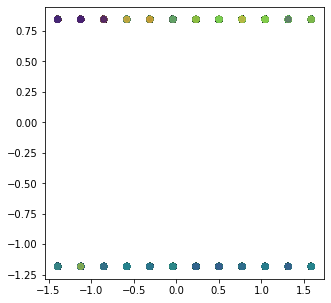

In [157]:
plt.figure(figsize=(5, 5))
plt.scatter(X_prep[:, 2], X_prep[:, 4], c=clusters,alpha=0.5)
plt.show()